In [1]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
database_name = 'clients.db'

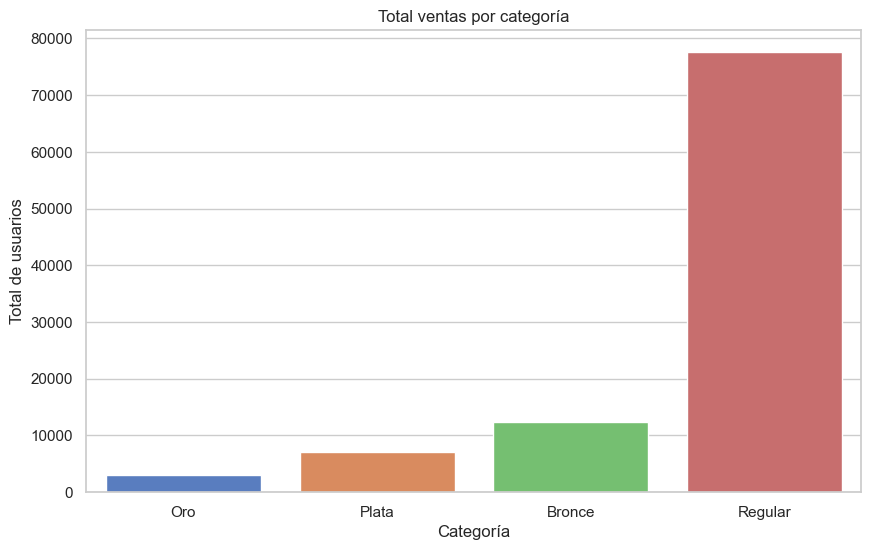

In [3]:
conn = sqlite3.connect(database_name)
c = conn.cursor()

c.execute('''
SELECT
        category,
        COUNT(*) AS total_users
    FROM
        (SELECT
            quantity_sales,
            CASE
                WHEN quantity_sales >= 3500 THEN 'Oro'
                WHEN quantity_sales >= 2300 THEN 'Plata'
                WHEN quantity_sales >= 1500 THEN 'Bronce'
                ELSE 'Regular'
            END AS category
        FROM
            clients)
    GROUP BY
        category;
''')

results = c.fetchall()

conn.close()

df = pd.DataFrame(results, columns=['Category', 'Total Users'])
df = df.sort_values(by='Total Users', ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Users', data=df, palette="muted", hue='Category')
plt.title('Total ventas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Total de usuarios')
plt.show()

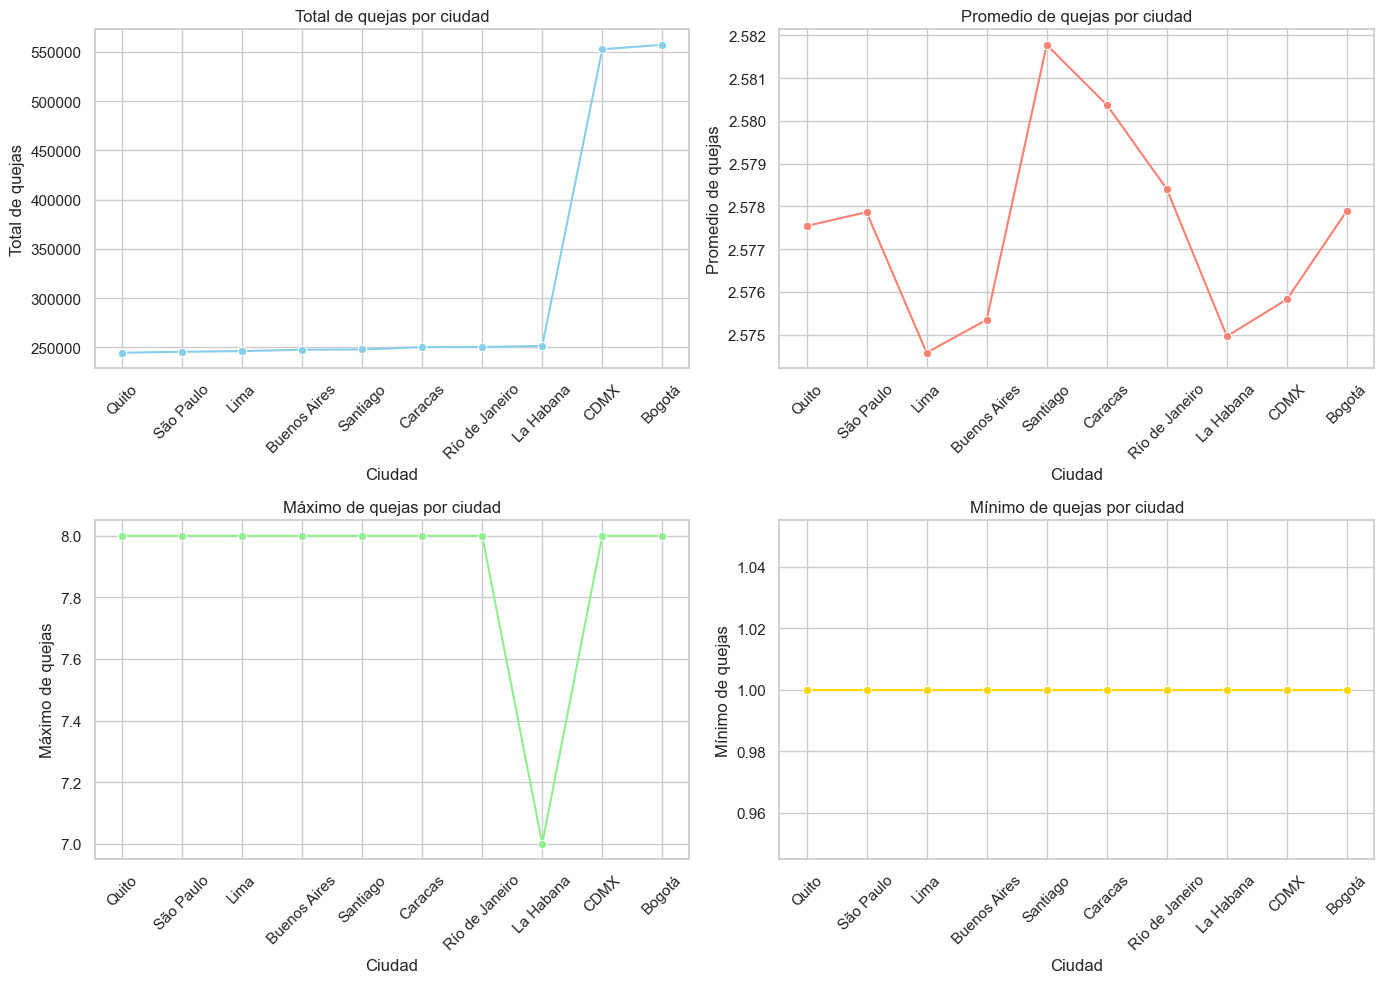

In [4]:
conn = sqlite3.connect(database_name)
c = conn.cursor()

c.execute('''
SELECT 
    c.city,
    SUM(cp.quantity) AS total,
    AVG(cp.quantity) AS avg,
    MAX(cp.quantity) AS max,
    MIN(cp.quantity) AS min
FROM clients c
INNER JOIN complaints cp ON c.id = cp.client_id
GROUP BY c.city;
''')

results = c.fetchall()

conn.close()

df = pd.DataFrame(results, columns=['City', 'Total', 'Mean', 'Max', 'Min'])
df = df.sort_values(by=['Total', 'Mean', 'Max', 'Min'], ascending=True)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.lineplot(x='City', y='Total', data=df, marker='o', color='skyblue')
plt.title('Total de quejas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Total de quejas')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.lineplot(x='City', y='Mean', data=df, marker='o', color='salmon')
plt.title('Promedio de quejas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Promedio de quejas')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.lineplot(x='City', y='Max', data=df, marker='o', color='lightgreen')
plt.title('Máximo de quejas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Máximo de quejas')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.lineplot(x='City', y='Min', data=df, marker='o', color='gold')
plt.title('Mínimo de quejas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Mínimo de quejas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

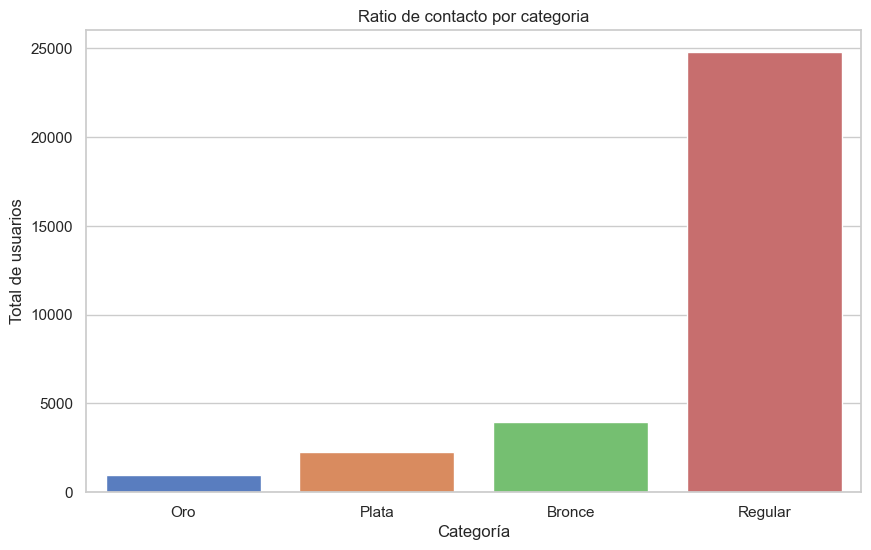

In [22]:
conn = sqlite3.connect(database_name)
c = conn.cursor()

c.execute('''
SELECT
    CASE
        WHEN c.quantity_sales >= 3500 THEN 'Oro'
        WHEN c.quantity_sales >= 2300 THEN 'Plata'
        WHEN c.quantity_sales >= 1500 THEN 'Bronce'
        ELSE 'Regular'
    END AS category,
    AVG(c.quantity_sales) as avg_sales,
    SUM(com.quantity) as avg_complaints
FROM clients c
INNER JOIN complaints com ON c.id = com.client_id
GROUP BY category
ORDER BY avg_sales DESC, avg_complaints DESC;
''')

results = c.fetchall()

conn.close()

df = pd.DataFrame(results, columns=['Category', 'Avg Sales', 'Avg Complaints'])

df['Ratio'] = (df['Avg Complaints'] / df['Avg Sales'].sum()) * 100

df.head(-1)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Ratio', data=df, palette="muted", hue='Category')
plt.title('Ratio de contacto por categoria')
plt.xlabel('Categoría')
plt.ylabel('Total de usuarios')
plt.show()